## Lectura 8-2: Transformaciones



Anteriormente comprobamos los supuestos de los modelos de regresión y vimos formas de diagnosticar posibles problemas. En este capítulo utilizaremos transformaciones tanto de la respuesta como de las variables predictoras para corregir problemas con el diagnóstico de modelos, y también para hacer que un modelo se ajuste mejor a los datos.



## Transformación de la respuesta

Veamos algunos datos salariales (*ficticios*) de la empresa (*ficticia*) *Initech*. Intentaremos modelar el `salario` como una función de los `años` de experiencia. Los datos se encuentran en

[`initech.csv`](data/initech.csv).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Cargamos los datos
initech = pd.read_csv('../data/initech.csv')

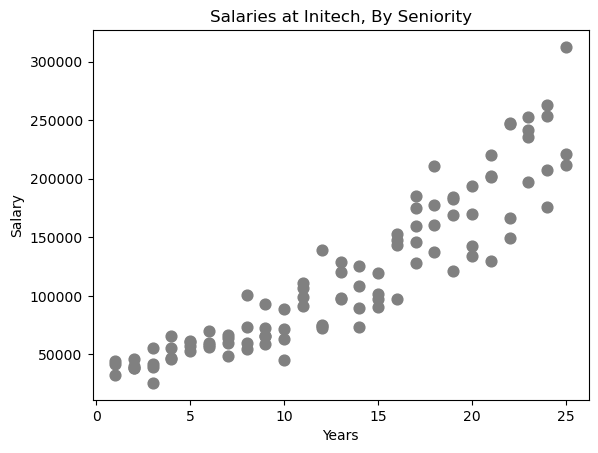

In [2]:
plt.scatter(initech['years'], initech['salary'], color='grey', s=60)  # s parameter is used for size of points
plt.title('Salaries at Initech, By Seniority')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.show()


Primero ajustamos un modelo lineal simple.


In [3]:
initech_fit = smf.ols('salary ~ years', data=initech).fit()
print(initech_fit.summary())


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     492.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           5.16e-40
Time:                        09:45:57   Log-Likelihood:                -1162.5
No. Observations:                 100   AIC:                             2329.
Df Residuals:                      98   BIC:                             2334.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5302.0807   5749.963      0.922      0.3


Este modelo parece significativo, pero ¿cumple los supuestos del modelo?


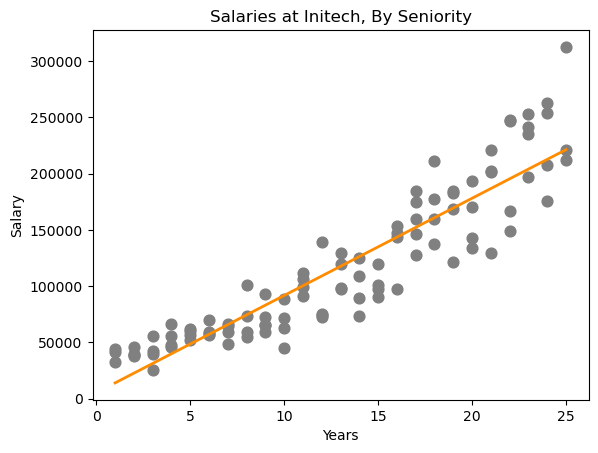

In [4]:
plt.scatter(initech['years'], initech['salary'], color='grey', s=60)
plt.title('Salaries at Initech, By Seniority')
plt.xlabel('Years')
plt.ylabel('Salary')

# Plotting the regression line
plt.plot(initech['years'], initech_fit.fittedvalues, color='darkorange', linewidth=2)

plt.show()




Añadiendo la línea ajustada al gráfico, vemos que la relación lineal parece correcta.


Text(0.5, 1.0, 'Normal Q-Q Plot')

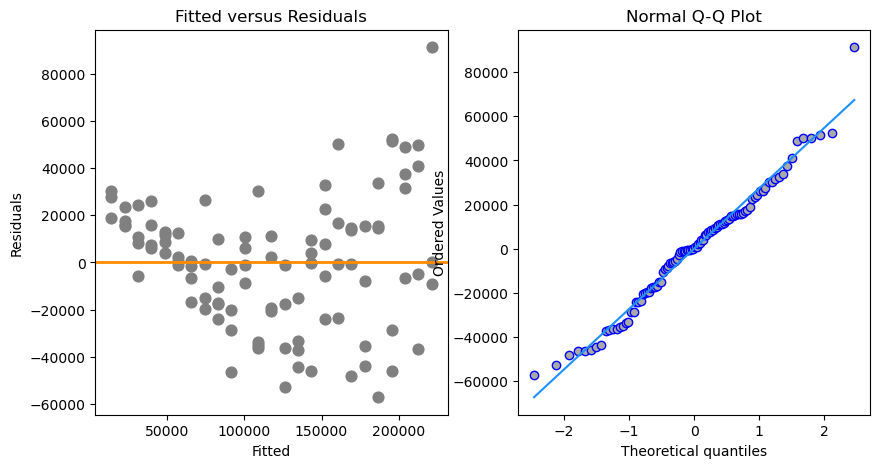

In [5]:
from scipy import stats
fig, ax = plt.subplots(1, 2, figsize=(10,5))

# Fitted vs Residuals Plot
ax[0].scatter(initech_fit.fittedvalues, initech_fit.resid, color='grey', s=60)
ax[0].axhline(y=0, color='darkorange', linewidth=2)
ax[0].set_title('Fitted versus Residuals')
ax[0].set_xlabel('Fitted')
ax[0].set_ylabel('Residuals')

# Q-Q Plot using scipy's probplot
stats.probplot(initech_fit.resid, plot=ax[1], fit=True)
ax[1].get_lines()[0].set_markerfacecolor('darkgrey')  # Changing the color of the dots to 'darkgrey'
ax[1].get_lines()[1].set_color('dodgerblue')  # Changing the color of the line to 'dodgerblue'
ax[1].set_title('Normal Q-Q Plot')


Sin embargo, del gráfico de valores ajustados frente a residuos se desprende que la varianza no es constante. Específicamente, la varianza aumenta a medida que aumenta el valor ajustado.



### Transformaciones estabilizadoras de la varianza
Recordemos que el valor ajustado es nuestra estimación de la media en un valor particular de $x$. Bajo nuestros supuestos habituales,
$$
  \epsilon \sim N(0,\sigma^2)
$$
y así
$$
  \text{Var}[Y | X = x] = \sigma^2
$$
que es un valor constante para cualquier valor de $x$.
Sin embargo, aquí vemos que la varianza es función de la media,
$$
  \text{Var}[Y \mid X = x] = h(\text{E}[Y \mid X = x]).
$$
En este caso, $h$ es alguna función creciente.
Para corregir esto, nos gustaría encontrar alguna función de $Y$, $g(Y)$ tal que,
$$
  \text{Var}[g(Y) \mid X = x] = c
$$
donde $c$ es una constante que no depende de la media, $\text{E}[Y \mid X = x]$. Una transformación que logra esto se llama una **transformación estabilizadora de la varianza.**
Una transformación estabilizadora de la varianza (VST) común cuando vemos el aumento de la varianza en un gráfico de ajuste frente a los residuos es $log(Y)$. Además, si los valores de una variable varían en másde un orden de magnitud y la variable es *estrictamente positiva*, entonces sustituir la variable por su logaritmo es probable que sea útil.
Recordemos que, para nuestros propósitos, $\log$ y $\ln$ son el logaritmo natural. R" utiliza "log" para referirse al logaritmo natural, a menos que se especifique una base diferente.
Ahora utilizaremos un modelo con una respuesta transformada logarítmicamente para los datos de *Initech*,
$$
  \log(Y_i) = \beta_0 + \beta_1 x_i + \epsilon_i.
$$
Obsérvese que si volvemos a escalar el modelo desde una escala logarítmica a la escala original de los datos, ahora tenemos
$$
  Y_i = \exp(\beta_0 + \beta_1 x_i) \cdot \exp(\epsilon_i)
$$
que hace que los errores entren en el modelo de forma multiplicativa.

El ajuste de este modelo en `Python` sólo requiere una pequeña modificación de la especificación de nuestra fórmula.


In [6]:
initech_fit_log = smf.ols('np.log(salary) ~ years', data=initech).fit()




Observe que aunque `log(y)` se considera la nueva variable de respuesta, en realidad no creamos una nueva variable en `Python`, sino que simplemente transformamos la variable dentro de la fórmula del modelo.


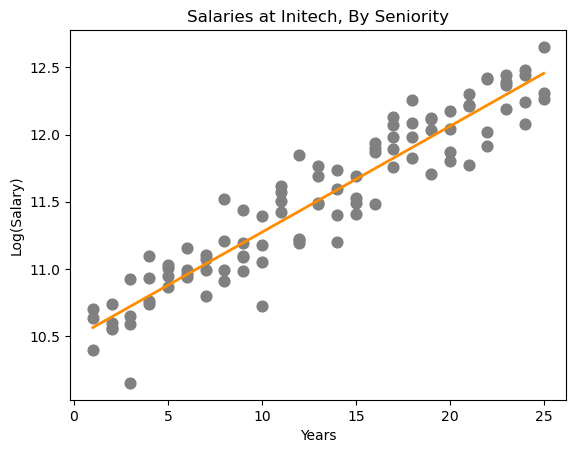

In [7]:

# Plotting
plt.scatter(initech['years'], np.log(initech['salary']), color='grey', s=60)
plt.plot(initech['years'], initech_fit_log.fittedvalues, color='darkorange', linewidth=2)
plt.title('Salaries at Initech, By Seniority')
plt.xlabel('Years')
plt.ylabel('Log(Salary)')
plt.show()


Si trazamos los datos en la escala logarítmica transformada y añadimos la recta ajustada, la relación vuelve a parecer lineal, y ya podemos ver que la variación en torno a la recta ajustada parece constante.


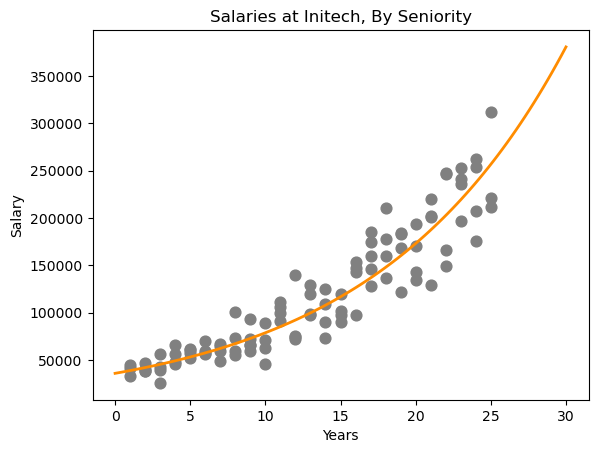

In [8]:
plt.scatter(initech['years'], initech['salary'], color='grey', s=60)
plt.title('Salaries at Initech, By Seniority')
plt.xlabel('Years')
plt.ylabel('Salary')

# Adding curve
x = np.linspace(0, 30, 100)  # Assuming the years go from 0 to 30
plt.plot(x, np.exp(initech_fit_log.params[0] + initech_fit_log.params[1] * x), color='darkorange', linewidth=2)

plt.show()



Trazando los datos en la escala original, y añadiendo la regresión ajustada, vemos una relación exponencial. Sin embargo, esto sigue siendo un modelo *lineal*, ya que la nueva respuesta transformada, $\log(y)$, sigue siendo una combinación *lineal* de los predictores.


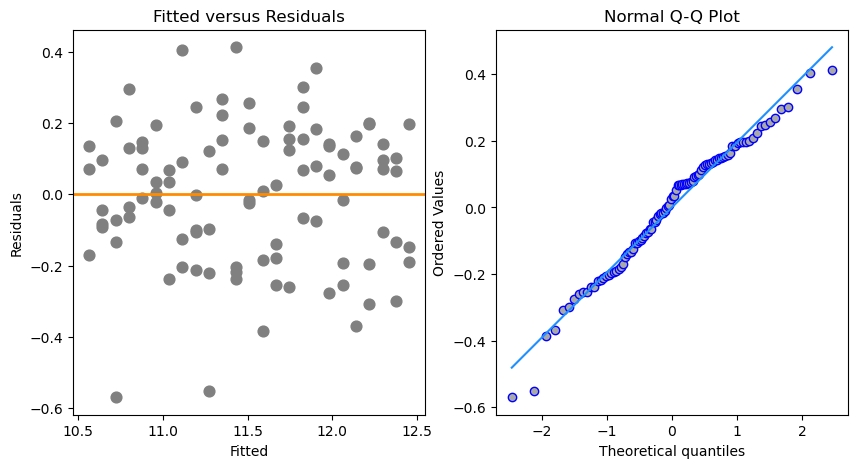

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

# Fitted vs Residuals Plot
ax[0].scatter(initech_fit_log.fittedvalues, initech_fit_log.resid, color='grey', s=60)
ax[0].axhline(y=0, color='darkorange', linewidth=2)
ax[0].set_title('Fitted versus Residuals')
ax[0].set_xlabel('Fitted')
ax[0].set_ylabel('Residuals')

# Q-Q Plot using scipy's probplot
stats.probplot(initech_fit_log.resid, plot=ax[1], fit=True)
ax[1].get_lines()[0].set_markerfacecolor('darkgrey')  # Changing the color of the dots to 'darkgrey'
ax[1].get_lines()[1].set_color('dodgerblue')  # Changing the color of the line to 'dodgerblue'
ax[1].set_title('Normal Q-Q Plot')

plt.show()



El gráfico de ajuste frente a los residuos tiene mucho mejor aspecto. Parece que ya no se incumple el supuesto de varianza constante.

Comparando el RMSE utilizando la respuesta original y la transformada, también vemos que el modelo transformado logarítmicamente simplemente se ajusta mejor, con un error cuadrático medio menor.


In [10]:
rmse_original = np.sqrt(np.mean(initech_fit.resid**2))
rmse_log_transformed = np.sqrt(np.mean(initech_fit_log.resid**2))



print('RMSE Original:', rmse_original)
print('RMSE Log Transformed:', rmse_log_transformed)



RMSE Original: 27080.161878492752
RMSE Log Transformed: 0.19349066503490941



Pero espera, eso no es justo, esta diferencia se debe simplemente a las diferentes escalas utilizadas.


In [11]:
rmse_manual_original = np.sqrt(np.mean((initech['salary'] - initech_fit.fittedvalues) ** 2))
rmse_manual_log_transformed = np.sqrt(np.mean((initech['salary'] - np.exp(initech_fit_log.fittedvalues)) ** 2))

print('Manual RMSE Original:', rmse_manual_original)
print('Manual RMSE Log Transformed:', rmse_manual_log_transformed)

Manual RMSE Original: 27080.161878492752
Manual RMSE Log Transformed: 24280.36450564545



Si volvemos a transformar los valores ajustados del modelo logarítmico a la escala de los datos, vemos que se ajusta mejor.


In [12]:
print(initech_fit_log.summary())


                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     805.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           4.63e-49
Time:                        09:45:58   Log-Likelihood:                 22.359
No. Observations:                 100   AIC:                            -40.72
Df Residuals:                      98   BIC:                            -35.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4838      0.041    255.179      0.0


De nuevo, la respuesta transformada es una combinación *lineal* de los predictores,

$$ \log(\hat{y}(x)) = \hat{\beta}_0 + \hat{\beta}_1 x  = 10.484 + 0.079x. $$

Pero ahora, si volvemos a escalar los datos desde una escala logarítmica a la escala original de los datos, ahora tenemos

$$ \hat{y}(x) = \exp(\hat{\beta}_0) \exp(\hat{\beta}_1 x) = \exp(10.484)\exp(0.079x).$$

Vemos que por cada año adicional de experiencia, el salario medio aumenta $\exp(0.079) = 1.0822$  veces. Ahora estamos multiplicando, no sumando.

Aunque el uso de una transformación $\log$ es posiblemente la transformación de variable de respuesta más común, existen muchas otras. Ahora consideraremos una familia de transformaciones y elegiremos la mejor de entre ellas, que incluye la transformación $\log$.



### Transformaciones de Box-Cox

El método de Box-Cox considera una familia de transformaciones sobre variables de respuesta estrictamente positivas,

$$g_\lambda(y) = \left\{
\begin{array}{lr}\displaystyle\frac{y^\lambda - 1}{\lambda} &  \lambda \neq 0\\
        & \\
       \log(y) &  \lambda = 0
     \end{array}
   \right. $$

El parámetro $\lambda$ se elige maximizando numéricamente la log-verosimilitud,

$$L(\lambda) = -\frac{n}{2}\log(RSS_\lambda / n) + (\lambda -1)\sum \log(y_i).$$

A $100(1 - \alpha)\%$ intervalo de confianza para $\lambda$ es,

$$ \left\{ \lambda :  L(\lambda) > L(\hat{\lambda}) - \frac{1}{2}\chi_{1,\alpha}^2  \right\} $$

A menudo elegimos un valor "bonito" dentro del intervalo de confianza, en lugar del valor de $\lambda$ que realmente maximiza la probabilidad.


In [15]:
# pip install faraway

Defaulting to user installation because normal site-packages is not writeable
  Using cached faraway-0.0.6-py3-none-any.whl (224 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import faraway.utils
import faraway.datasets.savings

savings = faraway.datasets.savings.load()
savings

,sr,pop15,pop75,dpi,ddpi
Australia,11.43,29.35,2.87,2329.68,2.87
Austria,12.07,23.32,4.41,1507.99,3.93
Belgium,13.17,23.80,4.43,2108.47,3.82
Bolivia,5.75,41.89,1.67,189.13,0.22
Brazil,12.88,42.19,0.83,728.47,4.56
Canada,8.79,31.72,2.85,2982.88,2.43
Chile,0.60,39.74,1.34,662.86,2.67
China,11.90,44.75,0.67,289.52,6.51
Colombia,4.98,46.64,1.06,276.65,3.08
Costa Rica,10.78,47.64,1.14,471.24,2.80



Primero utilizaremos el conjunto de datos `savings` como ejemplo del uso del método Box-Cox para justificar el uso de ninguna transformación. Ajustamos un modelo de regresión múltiple aditiva con `sr` como respuesta y cada una de las demás variables como predictores.


In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

dependent_var = 'sr'
independent_vars = savings.columns.tolist()
independent_vars.remove(dependent_var)  # remove the dependent variable from the list
formula = dependent_var + ' ~ ' + ' + '.join(independent_vars)

savings_model = smf.ols(formula, data=savings).fit()



A continuación, utilizamos la función `boxcox()` para encontrar la mejor transformación de la forma considerada por el método de Box Cox.



`Python` traza automáticamente la log-verosimilitud en función de los posibles valores de $\lambda$. Indica tanto el valor que maximiza la log-verosimilitud, sin embarbo, vamos a generar un intervalo de confianza para el valor $\lambda$ que maximiza la log-verosimilitud.


Lambda óptimo: 0.8981534507516964
Intervalo de confianza para lambda: (0.46365914786967366, 1.3909774436090219)


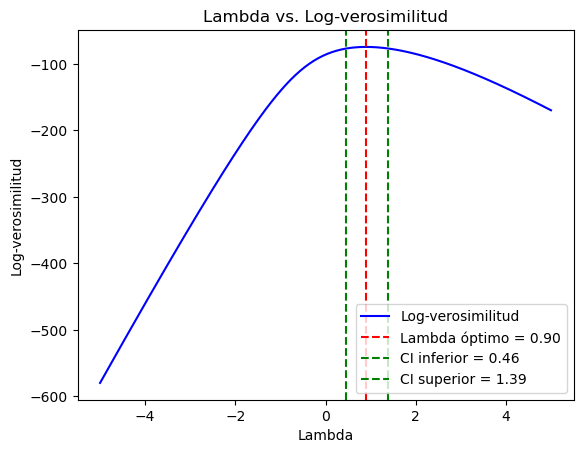

In [4]:
import numpy as np
from scipy.stats import boxcox, boxcox_llf
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Aplicar la transformación de Box-Cox
transformed_data, lambda_best_fit = boxcox(savings['sr'])

# Estimación del intervalo de confianza para lambda
lambdas = np.linspace(-5, 5, 400)
llf = [boxcox_llf(lam, savings['sr']) for lam in lambdas]
llf_max = boxcox_llf(lambda_best_fit, savings['sr'])
alpha = 0.05
crit = chi2.ppf(1 - alpha / 2, df=1)
lambda_ci_mask = np.array(llf) > llf_max - crit / 2
lambda_ci = lambdas[lambda_ci_mask]
lambda_ci_min = lambda_ci[0]
lambda_ci_max = lambda_ci[-1]

print(f"Lambda óptimo: {lambda_best_fit}")
print(f"Intervalo de confianza para lambda: ({lambda_ci_min}, {lambda_ci_max})")

# Gráfico de lambda vs. log-verosimilitud

plt.plot(lambdas, llf, color='blue', label='Log-verosimilitud')
plt.axvline(lambda_best_fit, color='red', linestyle='--', label=f'Lambda óptimo = {lambda_best_fit:.2f}')
plt.axvline(lambda_ci_min, color='green', linestyle='--', label=f'CI inferior = {lambda_ci_min:.2f}')
plt.axvline(lambda_ci_max, color='green', linestyle='--', label=f'CI superior = {lambda_ci_max:.2f}')
plt.xlabel('Lambda')
plt.ylabel('Log-verosimilitud')
plt.title('Lambda vs. Log-verosimilitud')
plt.legend()

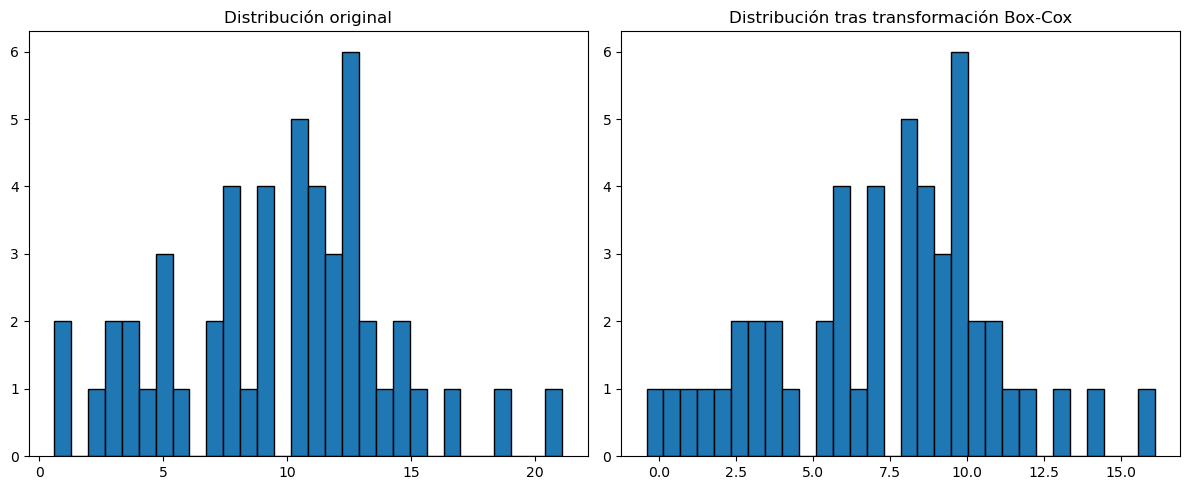

In [16]:

# Para visualizar la distribución original y transformada
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(savings['sr'], bins=30, edgecolor='k')
plt.title("Distribución original")

plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=30, edgecolor='k')
plt.title("Distribución tras transformación Box-Cox")

plt.tight_layout()
plt.show()

Ojo: Te comparto este código para que lo uses como patron para tus ejercicios.

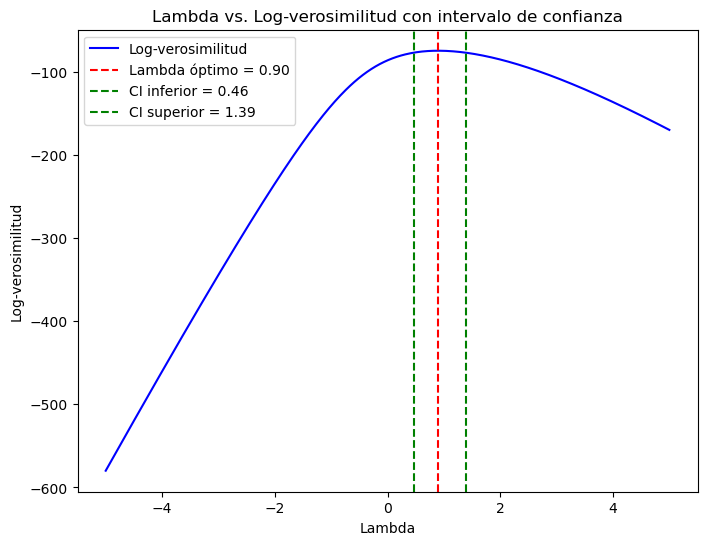

Lambda óptimo: 0.8981534507516964
Intervalo de confianza para lambda: (0.46365914786967366, 1.3909774436090219)


In [5]:
import numpy as np
from scipy.stats import boxcox, boxcox_llf, chi2
import matplotlib.pyplot as plt

def boxcox_lambda_ci_plot(data, alpha=0.05):
    """
    Calcula el lambda óptimo usando la transformación Box-Cox, su intervalo de confianza, y genera un gráfico.

    Parámetros:
        - data: datos a transformar (array-like)
        - alpha: nivel de significancia para el intervalo de confianza (default=0.05)
    
    Retorna:
        - lambda_best_fit: lambda óptimo
        - (lambda_ci_min, lambda_ci_max): intervalo de confianza para lambda
    """
    # Aplicar la transformación de Box-Cox para obtener lambda óptimo
    _, lambda_best_fit = boxcox(data)

    # Estimación del intervalo de confianza para lambda
    lambdas = np.linspace(-5, 5, 400)
    llf = [boxcox_llf(lam, data) for lam in lambdas]
    llf_max = boxcox_llf(lambda_best_fit, data)
    crit = chi2.ppf(1 - alpha / 2, df=1)
    lambda_ci_mask = np.array(llf) > llf_max - crit / 2
    lambda_ci = lambdas[lambda_ci_mask]
    lambda_ci_min = lambda_ci[0]
    lambda_ci_max = lambda_ci[-1]

    # Gráfico de lambda vs. log-verosimilitud
    plt.figure(figsize=(8, 6))
    plt.plot(lambdas, llf, color='blue', label='Log-verosimilitud')
    plt.axvline(lambda_best_fit, color='red', linestyle='--', label=f'Lambda óptimo = {lambda_best_fit:.2f}')
    plt.axvline(lambda_ci_min, color='green', linestyle='--', label=f'CI inferior = {lambda_ci_min:.2f}')
    plt.axvline(lambda_ci_max, color='green', linestyle='--', label=f'CI superior = {lambda_ci_max:.2f}')
    plt.xlabel('Lambda')
    plt.ylabel('Log-verosimilitud')
    plt.title('Lambda vs. Log-verosimilitud con intervalo de confianza')
    plt.legend()
    plt.show()

    return lambda_best_fit, (lambda_ci_min, lambda_ci_max)

# Uso de la función:
data_to_transform = savings['sr']  # Reemplazar con cualquier otro conjunto de datos
lambda_opt, lambda_interval = boxcox_lambda_ci_plot(data_to_transform)
print(f"Lambda óptimo: {lambda_opt}")
print(f"Intervalo de confianza para lambda: {lambda_interval}")



Tenga en cuenta que podemos especificar un rango de $\lambda$ valores a considerar y por lo tanto ser trazado. A menudo especificamos un rango que es visualmente más interesante. Aquí vemos que $\lambda = 1$ es a la vez en el intervalo de confianza, y es muy cerca del máximo. Esto sugiere una transformación de la forma

$$\frac{y^\lambda - 1}{\lambda} = \frac{y^1 - 1}{1} = y - 1.$$

En esencia, no se trata de una transformación. No cambiaría la varianza ni haría que el modelo se ajustara mejor. Restando 1 a cada valor, sólo cambiaríamos el intercepto del modelo, y los errores resultantes serían los mismos.


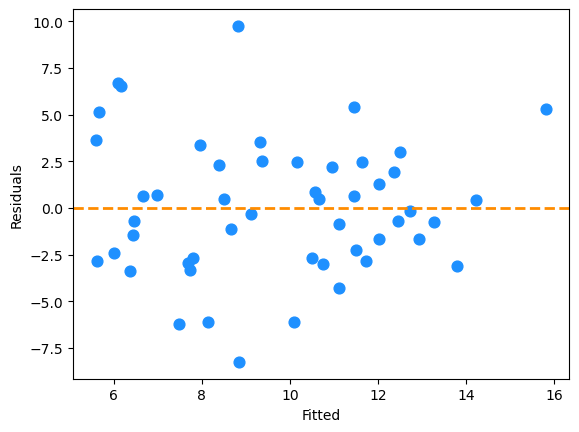

In [19]:
# Fitted vs Residuals Plot
plt.scatter(savings_model.fittedvalues, savings_model.resid, color='dodgerblue', s=60)
plt.axhline(y=0, linestyle='--', color='darkorange', linewidth=2)
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.show()


Si se compara el ajuste con los residuos, se comprueba que no hay ningún problema con los supuestos de este modelo, como demuestran las pruebas de Breusch-Pagan y Shapiro-Wilk.


In [20]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Breusch-Pagan Test
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_test = sms.het_breuschpagan(savings_model.resid, savings_model.model.exog)
lzip(names, bp_test)

[('Lagrange multiplier statistic', 4.985161299125018),
 ('p-value', 0.2888234302832432),
 ('f-value', 1.2458794973770801),
 ('f p-value', 0.3052588476653877)]

In [21]:
# Shapiro-Wilk Test for Normality
print(stats.shapiro(savings_model.resid))

ShapiroResult(statistic=0.9869844317436218, pvalue=0.8523984551429749)



Ahora utilizaremos el conjunto de datos `gala` como ejemplo de utilización del método Box-Cox para justificar una transformación distinta de $\log$. Ajustamos un modelo de regresión múltiple aditiva con `Species` como respuesta y la mayoría de las demás variables como predictores.


In [19]:
import faraway.datasets.galapagos

gala = faraway.datasets.galapagos.load()
gala

,Species,Area,Elevation,Nearest,Scruz,Adjacent
Baltra,58,25.09,346,0.6,0.6,1.84
Bartolome,31,1.24,109,0.6,26.3,572.33
Caldwell,3,0.21,114,2.8,58.7,0.78
Champion,25,0.10,46,1.9,47.4,0.18
Coamano,2,0.05,77,1.9,1.9,903.82
Daphne.Major,18,0.34,119,8.0,8.0,1.84
Daphne.Minor,24,0.08,93,6.0,12.0,0.34
Darwin,10,2.33,168,34.1,290.2,2.85
Eden,8,0.03,71,0.4,0.4,17.95
Enderby,2,0.18,112,2.6,50.2,0.10


In [21]:
# Model for gala
gala_model = smf.ols('Species ~ Area + Elevation + Nearest + Scruz + Adjacent', data=gala).fit()


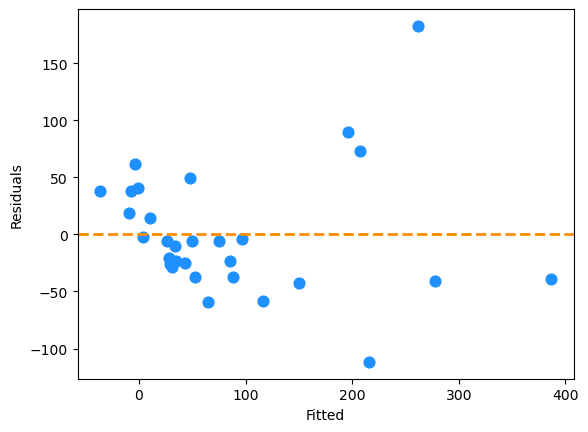

In [22]:
# Fitted vs Residuals Plot for gala_model
plt.scatter(gala_model.fittedvalues, gala_model.resid, color='dodgerblue', s=60)
plt.axhline(y=0, linestyle='--', color='darkorange', linewidth=2)
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.show()


Aunque no hay muchos datos para valores ajustados grandes, sigue pareciendo muy claro que se viola la hipótesis de varianza constante.


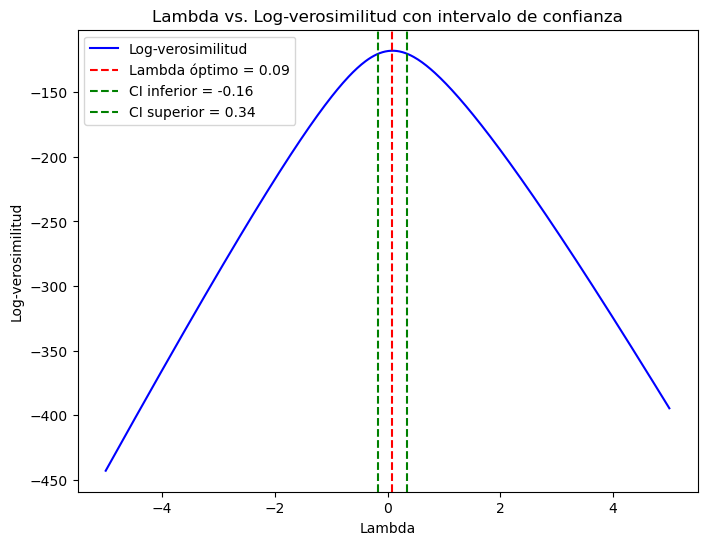

(0.08809980398939382, (-0.162907268170426, 0.33834586466165373))

In [23]:
boxcox_lambda_ci_plot(gala['Species'], alpha=0.05)


Utilizando el método de Box-Cox, vemos que $\lambda = 0,09$ está tanto en el intervalo de confianza, como extremadamente cerca del máximo, lo que sugiere una transformación de la forma

$$\frac{y^\lambda - 1}{\lambda} = \frac{y^{0.09} - 1}{0.09}.$$

A continuación, ajustamos un modelo con esta transformación aplicada a la respuesta.


In [24]:

# Add a new transformed variable to the DataFrame
gala['transformed_species'] = ((np.power(gala['Species'], 0.09) - 1) / 0.09)

# Now, use this new variable in the formula
gala_model_cox = smf.ols('transformed_species ~ Area + Elevation + Nearest + Scruz + Adjacent', data=gala).fit()




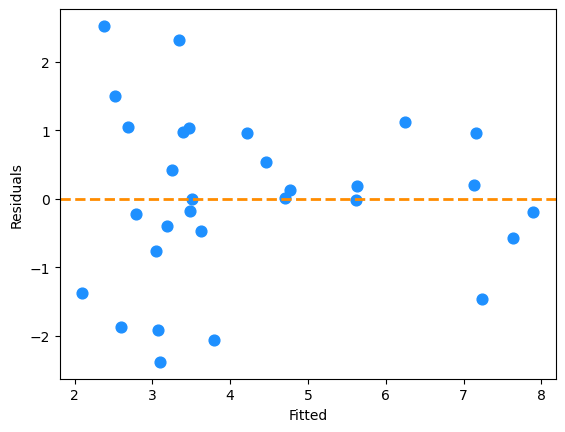

In [25]:

# Fitted vs Residuals Plot for gala_model_cox
plt.scatter(gala_model_cox.fittedvalues, gala_model_cox.resid, color='dodgerblue', s=60)
plt.axhline(y=0, linestyle='--', color='darkorange', linewidth=2)
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.show()


El gráfico resultante del ajuste frente a los residuos tiene mucho mejor aspecto.

Por último, volvemos a los datos `initech` y al modelo `initech_fit` que habíamos utilizado antes. Recordemos que este fue el modelo sin transformar, que hemos utilizado un $\log$ transformar a arreglar.


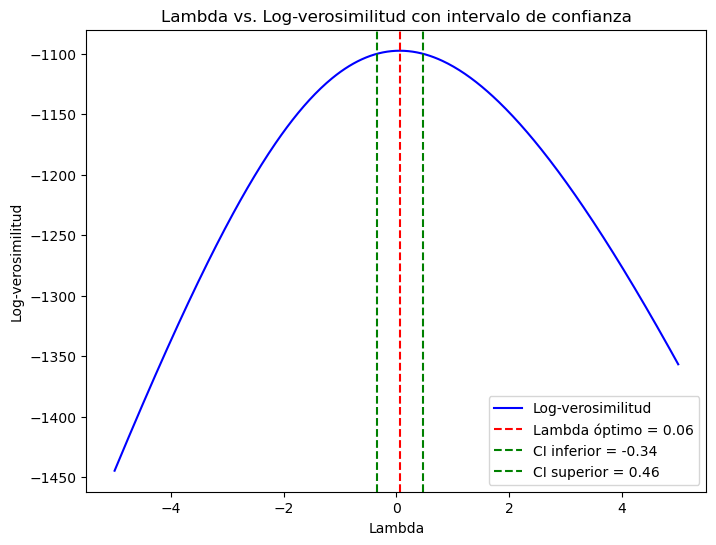

(0.060395700915407545, (-0.3383458646616546, 0.46365914786967366))

In [6]:
boxcox_lambda_ci_plot(initech['salary'], alpha=0.05)


Usando el método Box-Cox, vemos que $\lambda = 0$ está en el intervalo, y extremadamente cerca del máximo, lo que sugiere una transformación de la forma

$\log(y)$

¡Así que el método Box-Cox justifica nuestra elección anterior de una transformación $\log$!



## Transformación del predictor

Además de la transformación de la variable de respuesta, también podemos considerar transformaciones de las variables predictoras. A veces estas transformaciones pueden ayudar con la violación de los supuestos del modelo, y otras veces se pueden utilizar simplemente para ajustar un modelo más flexible.


In [29]:
# Read data frame from the web
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
autompg = pd.read_csv(url, sep="\s+", header=None, comment="\t", quotechar="\"", na_values=["?"])

# Assign headers to the dataframe
autompg.columns = ["mpg", "cyl", "disp", "hp", "wt", "acc", "year", "origin", "name"]

# Remove rows with missing 'hp' data
autompg = autompg[autompg['hp'].notna()]

# Remove 'plymouth reliant'
autompg = autompg[autompg['name'] != "plymouth reliant"]

# Create row names based on the engine, year, and name
autompg.index = autompg['cyl'].astype(str) + " cylinder " + autompg['year'].astype(str) + " " + autompg['name']

# Drop the 'name' column
autompg.drop('name', axis=1, inplace=True)

# Convert horsepower from object to numeric
autompg['hp'] = pd.to_numeric(autompg['hp'], errors='coerce')

# Create a dummy variable for foreign vs. domestic cars. Domestic = 1.
autompg['domestic'] = (autompg['origin'] == 1).astype(int)

# Remove 3 and 5 cylinder cars
autompg = autompg[~autompg['cyl'].isin([3, 5])]

# Change 'cyl' to a category variable
autompg['cyl'] = autompg['cyl'].astype('category')

# Display the structure (similar to str in R)
print(autompg.info())


<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, 8 cylinder 70 chevrolet chevelle malibu to 4 cylinder 82 chevy s-10
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   mpg       383 non-null    float64 
 1   cyl       383 non-null    category
 2   disp      383 non-null    float64 
 3   hp        383 non-null    float64 
 4   wt        383 non-null    float64 
 5   acc       383 non-null    float64 
 6   year      383 non-null    int64   
 7   origin    383 non-null    int64   
 8   domestic  383 non-null    int32   
dtypes: category(1), float64(5), int32(1), int64(2)
memory usage: 25.9+ KB
None



Recordemos el conjunto de datos `autompg` del capítulo anterior. Aquí intentaremos modelar las `mpg` en función de los `hp`.


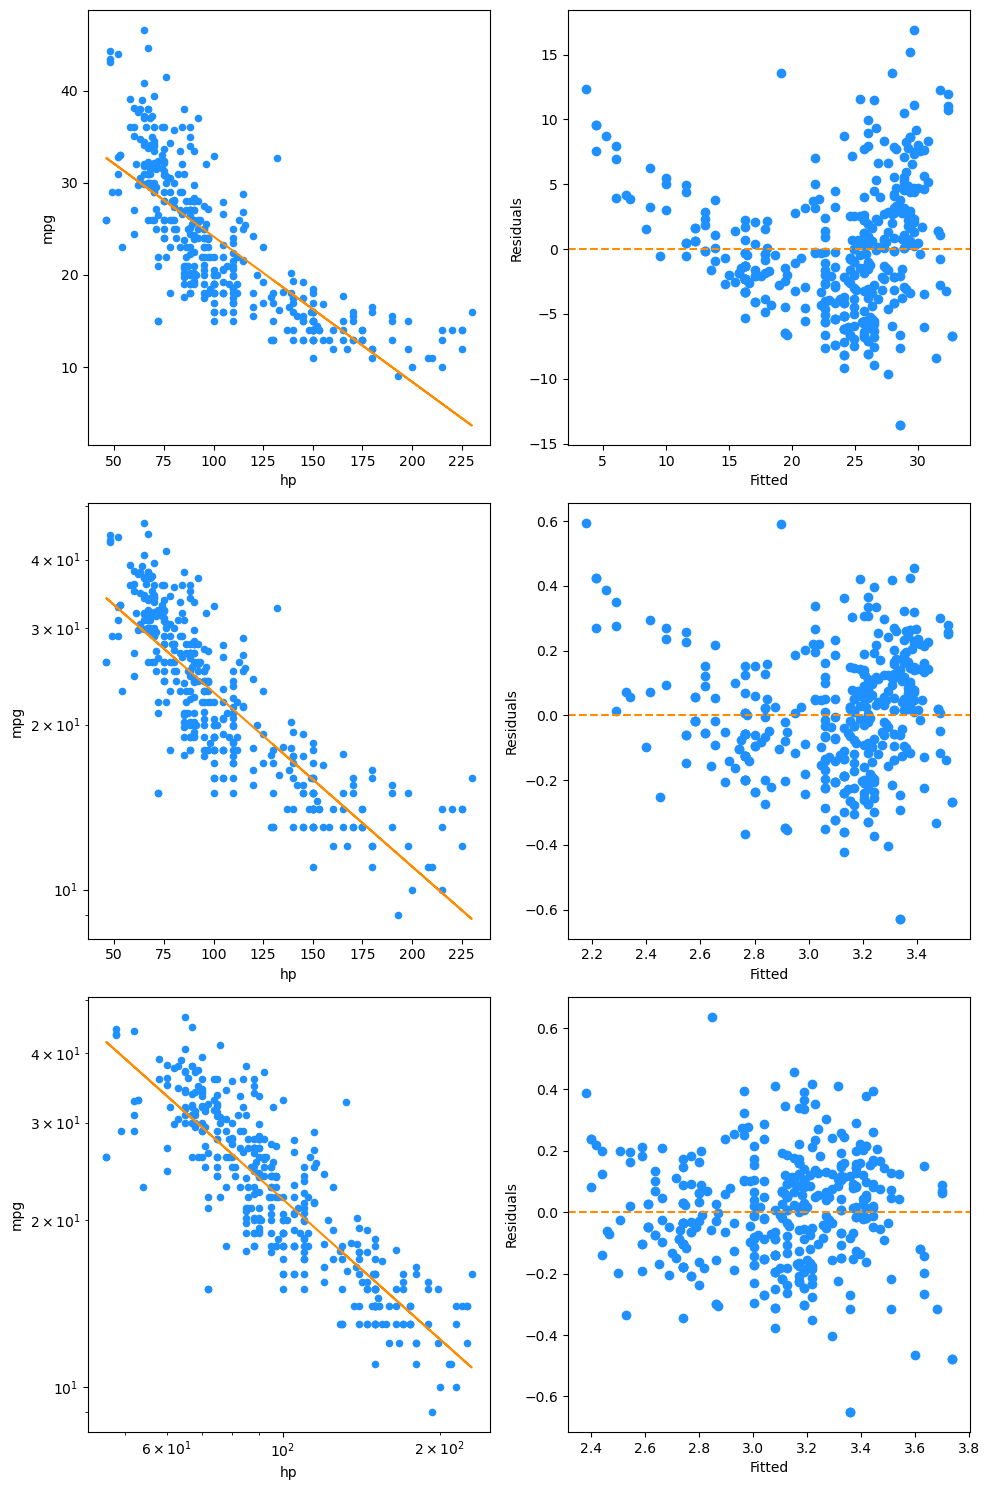

In [30]:
# Load 'autompg' dataset
# autompg = pd.read_csv('path_to_autompg.csv')  # adjust path to your actual path to 'autompg.csv'

# Assuming 'autompg' DataFrame is loaded and available
fig, axs = plt.subplots(3, 2, figsize=(10,15))

# First Row Plots
mpg_hp = smf.ols('mpg ~ hp', data=autompg).fit()
autompg.plot.scatter(x='hp', y='mpg', ax=axs[0, 0], color='dodgerblue')
axs[0, 0].plot(autompg['hp'], mpg_hp.fittedvalues, color='darkorange')
axs[0, 1].scatter(mpg_hp.fittedvalues, mpg_hp.resid, color='dodgerblue')
axs[0, 1].axhline(y=0, linestyle='--', color='darkorange')

# Second Row Plots
mpg_hp_log = smf.ols('np.log(mpg) ~ hp', data=autompg).fit()
autompg.plot.scatter(x='hp', y='mpg', ax=axs[1, 0], color='dodgerblue', logy=True)
axs[1, 0].plot(autompg['hp'], np.exp(mpg_hp_log.fittedvalues), color='darkorange')
axs[1, 1].scatter(mpg_hp_log.fittedvalues, mpg_hp_log.resid, color='dodgerblue')
axs[1, 1].axhline(y=0, linestyle='--', color='darkorange')

# Third Row Plots
mpg_hp_loglog = smf.ols('np.log(mpg) ~ np.log(hp)', data=autompg).fit()
autompg.plot.scatter(x='hp', y='mpg', ax=axs[2, 0], color='dodgerblue', loglog=True)
axs[2, 0].plot(autompg['hp'], np.exp(mpg_hp_loglog.fittedvalues), color='darkorange')
axs[2, 1].scatter(mpg_hp_loglog.fittedvalues, mpg_hp_loglog.resid, color='dodgerblue')
axs[2, 1].axhline(y=0, linestyle='--', color='darkorange')

# Adjust labels
for i in range(3):
    axs[i, 0].set_xlabel('hp')
    axs[i, 0].set_ylabel('mpg')
    axs[i, 1].set_xlabel('Fitted')
    axs[i, 1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()


Primero intentamos SLR, pero vemos un patrón bastante obvio en el gráfico de ajuste frente a residuos, que incluye el aumento de la varianza, por lo que intentamos una transformación $\log$ de la respuesta.



Después de realizar la transformada $\log$ de la respuesta, todavía tenemos algunos de los mismos problemas con el ajuste frente a la respuesta. Ahora, vamos a tratar también $\log$ transformar el **predictor**.



Finalmenete, nuestro gráfico de ajuste versus residuales se ve bien luego de transformación.


In [ ]:
# Lo invito a que realice las transformaciones correspondientes de los predictores!!!
## Escriba su código aquí


### Polinomios

Otra "transformación" muy común de una variable predictora es el uso de transformaciones polinómicas. Son extremadamente útiles ya que permiten modelos más flexibles, pero no cambian las unidades de las variables.

No debería sorprendernos que las ventas de un producto estén relacionadas con el  el presupuesto publicitario del mismo, pero hay rendimientos decrecientes. Una empresa no siempre puede esperar rendimientos lineales a partir de un aumento del presupuesto publicitario.

Consideremos los datos mensuales de las ventas de widgets de *Initech*, $y$, en función del gasto en publicidad de *Initech* para dicho widget, $x$, ambos en diez mil dólares. Los datos se encuentran en
[`marketing.csv`](data/marketing.csv).


In [31]:

# Load the marketing dataset

marketing = pd.read_csv('../data/marketing.csv')

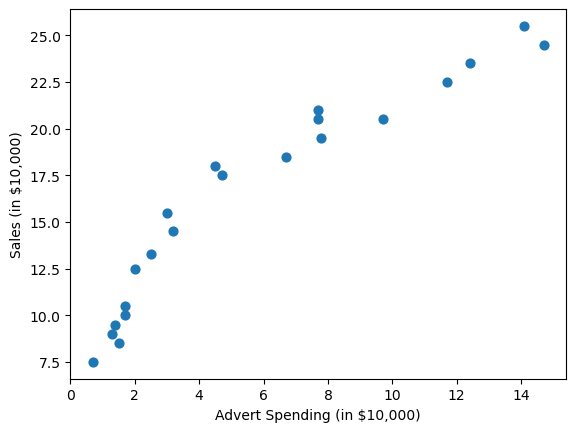

In [32]:
# Plot sales vs advert
plt.scatter(marketing['advert'], marketing['sales'], s=40)
plt.xlabel('Advert Spending (in $10,000)')
plt.ylabel('Sales (in $10,000)')
plt.show()



Nos gustaría ajustar el modelo,

$$ Y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \epsilon_i $$

where $\epsilon_i \sim N(0,\sigma^2)$ para $i = 1, 2, \cdots 21.$

La respuesta $y$ es ahora una función **lineal** de "dos" variables, lo que permite que $y$ sea una función no lineal del predictor único original $x$. Consideramos que se trata de una transformación, aunque en realidad, en cierto sentido, hemos añadido otro predictor.

Así, nuestra matriz $X$ es

$$\begin{bmatrix}
  1      & x_1 & x_1^2    \\[3pt]
  1      & x_2  & x_2^2   \\[3pt]
  1      & x_3  & x_3^2   \\[3pt]
  \vdots & \vdots & \vdots \\[3pt]
  1      & x_{n}  & x_{n}^2   \\
  \end{bmatrix}
$$

A continuación, podemos proceder a ajustar el modelo como hemos hecho en el pasado para la regresión lineal múltiple.

$$ \hat{\beta} = \left(  X^\top X  \right)^{-1}X^\top y.$$

Nuestras estimaciones tendrán las propiedades habituales. La media sigue siendo

$$E[\hat{\beta}] = \beta,$$

y la varianza

$$\text{Var}[\hat{\beta}] = \sigma^2 \left(  X^\top X  \right)^{-1}. $$

También mantenemos los mismos resultados distributivos

$$\hat{\beta}_j \sim N\left(\beta_j, \sigma^2 C_{jj}  \right).$$


In [33]:
# Linear Model: sales ~ advert
mark_mod = smf.ols('sales ~ advert', data=marketing).fit()
print(mark_mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     161.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           9.65e-11
Time:                        09:49:52   Log-Likelihood:                -42.304
No. Observations:                  21   AIC:                             88.61
Df Residuals:                      19   BIC:                             90.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4502      0.681     13.885      0.0


Aunque el modelo SLR es significativo, el gráfico de ajuste frente a los residuos tendría un patrón muy claro.


In [34]:
# Polynomial Model of Degree 2: sales ~ advert + advert^2
mark_mod_poly2 = smf.ols('sales ~ advert + I(advert ** 2)', data=marketing).fit()
print(mark_mod_poly2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     209.0
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           3.49e-13
Time:                        09:49:52   Log-Likelihood:                -32.492
No. Observations:                  21   AIC:                             70.98
Df Residuals:                      18   BIC:                             74.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.7616      0.672     10.


Para añadir el término de segundo orden necesitamos utilizar la función `I()` en la especificación del modelo alrededor de nuestro predictor recién creado. Vemos que con el término de primer orden en el modelo, el término cuadrático también es significativo.



También podríamos añadir términos de orden superior, como un predictor de tercer grado. Esto es fácil de hacer. Nuestra matriz $X$ simplemente se hace más grande de nuevo.

$$ Y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \beta_3 x_i^3 + \epsilon_i$$

$$
\begin{bmatrix}
  1      & x_1 & x_1^2  & x_1^3    \\[3pt]
  1      & x_2  & x_2^2  & x_2^3   \\[3pt]
  1      & x_3  & x_3^2  & x_3^3   \\[3pt]
  \vdots & \vdots & \vdots & \vdots \\[3pt]
  1      & x_{n}  & x_{n}^2  & x_{n}^3    \\
  \end{bmatrix}
$$


In [35]:
# Polynomial Model of Degree 3: sales ~ advert + advert^2 + advert^3
mark_mod_poly3 = smf.ols('sales ~ advert + I(advert ** 2) + I(advert ** 3)', data=marketing).fit()
print(mark_mod_poly3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     310.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           4.89e-15
Time:                        09:49:52   Log-Likelihood:                -23.739
No. Observations:                  21   AIC:                             55.48
Df Residuals:                      17   BIC:                             59.66
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.8901      0.762      5.


Ahora vemos que con los términos de primer y segundo orden en el modelo, el término de tercer orden también es significativo. Pero, ¿tiene esto sentido en la práctica? El siguiente gráfico nos da una pista de por qué no lo tiene. (El modelo con el término de tercer orden no tiene rendimientos decrecientes).


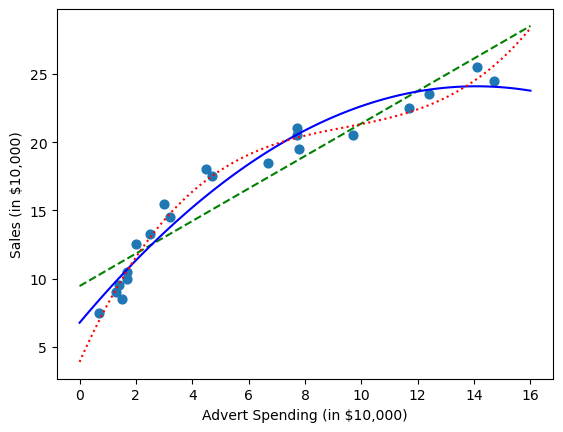

In [36]:
# Polynomial Model Visualization
xplot = np.linspace(0, 16, 100)
plt.scatter(marketing['advert'], marketing['sales'], s=40)
plt.plot(xplot, mark_mod.predict(pd.DataFrame({'advert': xplot})), color='green', linestyle='--')
plt.plot(xplot, mark_mod_poly2.predict(pd.DataFrame({'advert': xplot})), color='blue')
plt.plot(xplot, mark_mod_poly3.predict(pd.DataFrame({'advert': xplot})), color='red', linestyle='dotted')
plt.xlabel('Advert Spending (in $10,000)')
plt.ylabel('Sales (in $10,000)')
plt.show()


Nótese que podríamos ajustar un polinomio de orden arbitrario,

$$Y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \cdots + \beta_{p-1}x_i^{p-1} + \epsilon_i$$

Sin embargo, hay que tener cuidado con el sobreajuste, ya que con un polinomio de grado uno menos que el número de observaciones, a veces es posible ajustar perfectamente un modelo.


In [37]:
# Create a new dataset with some randomness
np.random.seed(1234)
x = np.linspace(0, 10, 11)
y = 3 + x + 4 * x ** 2 + np.random.normal(0, 20, 11)

In [38]:
fit = smf.ols('y ~ x + I(x ** 2)', data=pd.DataFrame({'x': x, 'y': y})).fit()

# Polynomial Model of High Degree
fit_perf = smf.ols('y ~ x + I(x ** 2) + I(x ** 3) + I(x ** 4) + I(x ** 5) + I(x ** 6) + I(x ** 7) + I(x ** 8) + I(x ** 9) + I(x ** 10)', data=pd.DataFrame({'x': x, 'y': y})).fit()
print(fit_perf.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 09 Oct 2023   Prob (F-statistic):                nan
Time:                        09:49:52   Log-Likelihood:                 87.385
No. Observations:                  11   AIC:                            -152.8
Df Residuals:                       0   BIC:                            -148.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.4286        inf          0        n

c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


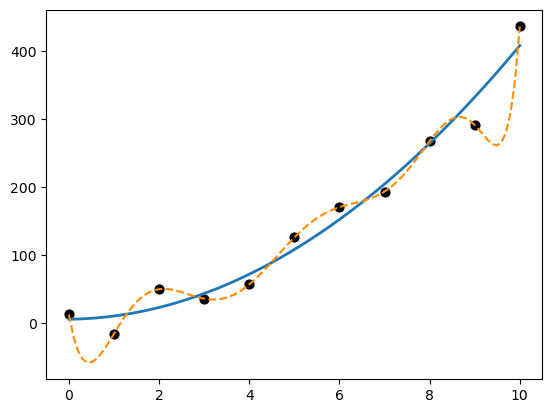

In [39]:
# Visualizing Polynomial Model
plt.scatter(x, y, c='black', s=40)
xplot = np.linspace(0, 10, 100)
plt.plot(xplot, fit.predict(pd.DataFrame({'x': xplot})), linewidth=2)
plt.plot(xplot, fit_perf.predict(pd.DataFrame({'x': xplot})), color='darkorange', linestyle='dashed')
plt.show()


Observe que en el resumen, `Python` no pudo calcular los errores estándar. Este es el resultado de estar "fuera" de los grados de libertad. Con 11 parámetros $\beta$ y 11 puntos de datos, usamos todos los grados de libertad antes de que podamos estimar $\sigma$.

En este ejemplo, la verdadera relación es cuadrática, pero el ajuste del polinomio de orden 10 es "perfecto". En la prõxima lectura nos centraremos en el equilibrio entre la bondad del ajuste (minimización de errores) y la complejidad del modelo.



Supongamos que trabaja para un fabricante de automóviles que fabrica una gran berlina de lujo. Le gustaría saber cómo se comporta el carro desde el punto de vista de la eficiencia del combustible cuando se conduce a distintas velocidades. En lugar de probar el carro a todas las velocidades imaginables (lo que sería imposible), se crea un experimento en el que el carro se conduce a las velocidades de interés en incrementos de 5 millas por hora.

Nuestro objetivo, entonces, es ajustar un modelo a estos datos para poder predecir la eficiencia del combustible cuando se conduce a ciertas velocidades. Los datos de este ejemplo se pueden encontrar en [`fuel_econ.csv`](data/fuel_econ.csv).


In [40]:

econ  = pd.read_csv('../data/fuel_econ.csv')


En este ejemplo, miraremos con frecuencia el gráfico de ajuste frente a los residuos, por lo que *deberíamos* escribir una función que nos facilite la vida, observela abajo, creo que es una buena manera de prácticar los conocimientos adquiridos en las aulas de fundamentos de programación.



In [41]:
def plot_econ_curve(model, econ):
    plt.scatter(econ.mph, econ.mpg, c='dodgerblue')
    plt.xlabel("Speed (Miles per Hour)")
    plt.ylabel("Fuel Efficiency (Miles per Gallon)")
    xplot = np.arange(10, 75.1, 0.1)
    plt.plot(xplot, model.predict(pd.DataFrame({'mph': xplot})), c='darkorange', lw=2)
    plt.show()


Así que primero ajustamos una regresión lineal simple a estos datos.


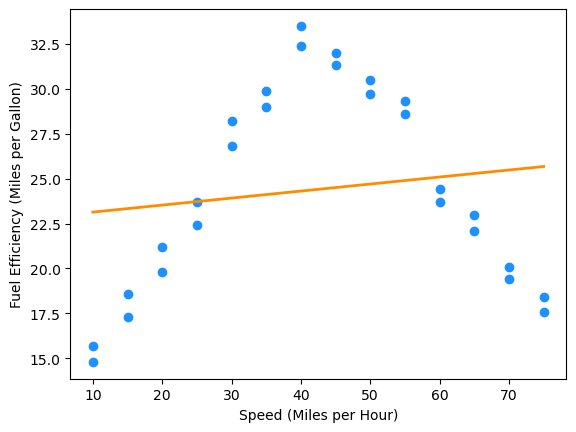

In [42]:
# Fit the Models
fit1 = smf.ols('mpg ~ mph', data=econ).fit()
plot_econ_curve(fit1, econ)

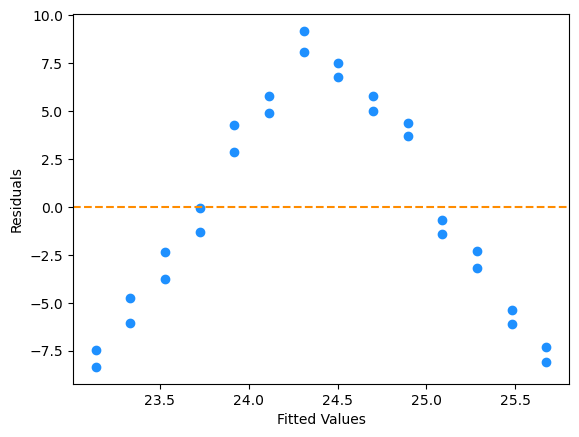

In [43]:
# plot the residuals
plt.scatter(fit1.fittedvalues, fit1.resid, c='dodgerblue')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, linestyle='--', color='darkorange')
plt.show()



Está claro que podemos hacerlo mejor. Sí, la eficiencia del combustible aumenta al aumentar la velocidad, pero sólo hasta cierto punto.

Ahora añadiremos términos polinómicos hasta que consigamos un ajuste adecuado.


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     141.5
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.34e-14
Time:                        09:49:53   Log-Likelihood:                -52.392
No. Observations:                  28   AIC:                             110.8
Df Residuals:                      25   BIC:                             114.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.4445      1.424      1.716      

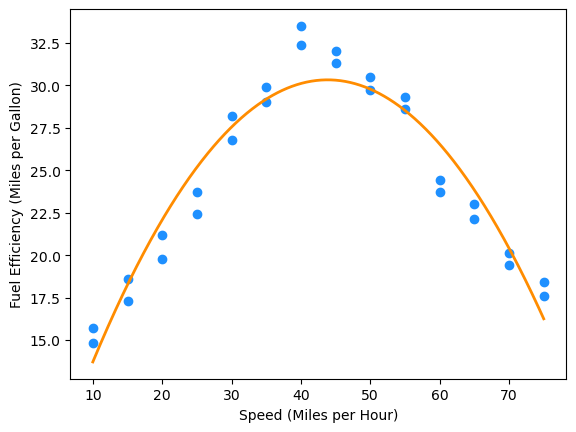

In [44]:
# Second model
fit2 = smf.ols('mpg ~ mph + I(mph ** 2)', data=econ).fit()
print(fit2.summary())
plot_econ_curve(fit2, econ)

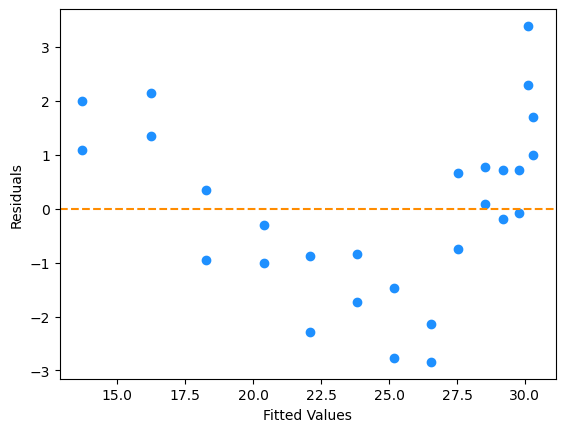

In [45]:
#plot the residuals
plt.scatter(fit2.fittedvalues, fit2.resid, c='dodgerblue')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, linestyle='--', color='darkorange')
plt.show()



Aunque este modelo se ajusta mucho mejor y el término de segundo orden es significativo, seguimos viendo un patrón en el gráfico de ajuste frente a los residuos que sugiere que los términos de orden superior ayudarán. Además, cabría esperar que la curva se aplanara a medida que aumenta o disminuye la velocidad, y no que descendiera bruscamente como vemos aquí.


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     90.56
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           3.17e-13
Time:                        09:49:53   Log-Likelihood:                -52.388
No. Observations:                  28   AIC:                             112.8
Df Residuals:                      24   BIC:                             118.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2578      2.768      0.816      

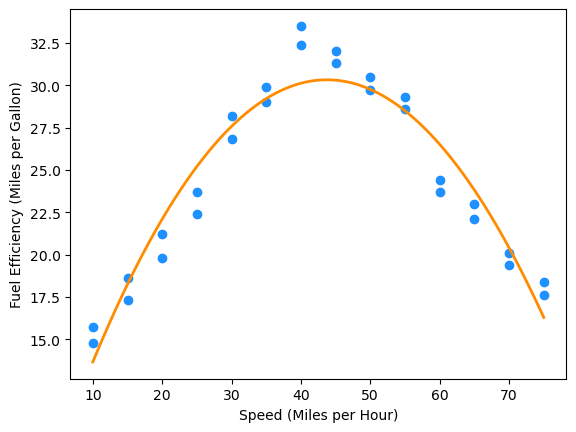

In [46]:
fit3 = smf.ols('mpg ~ mph + I(mph ** 2) + I(mph ** 3)', data=econ).fit()
print(fit3.summary())
plot_econ_curve(fit3, econ)

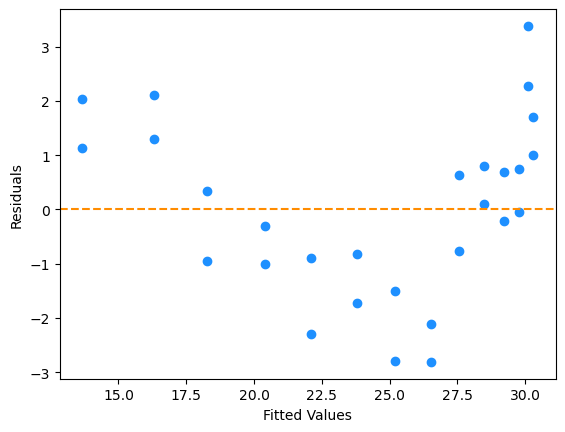

In [47]:
#plot the residuals
plt.scatter(fit3.fittedvalues, fit3.resid, c='dodgerblue')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, linestyle='--', color='darkorange')
plt.show()



Añadir el término de tercer orden no parece ayudar en absoluto. La curva ajustada apenas cambia. Esto tiene sentido, ya que lo que queremos es que la curva se aplane en los extremos. Para ello necesitaremos un término polinómico de grado par.


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     240.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.14e-18
Time:                        09:49:53   Log-Likelihood:                -34.965
No. Observations:                  28   AIC:                             79.93
Df Residuals:                      23   BIC:                             86.59
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      21.4605      2.965      7.238      

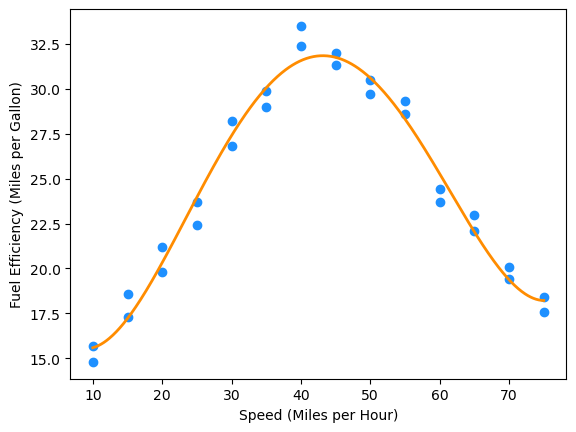

In [48]:
fit4 = smf.ols('mpg ~ mph + I(mph ** 2) + I(mph ** 3) + I(mph ** 4)', data=econ).fit()
print(fit4.summary())
plot_econ_curve(fit4, econ)


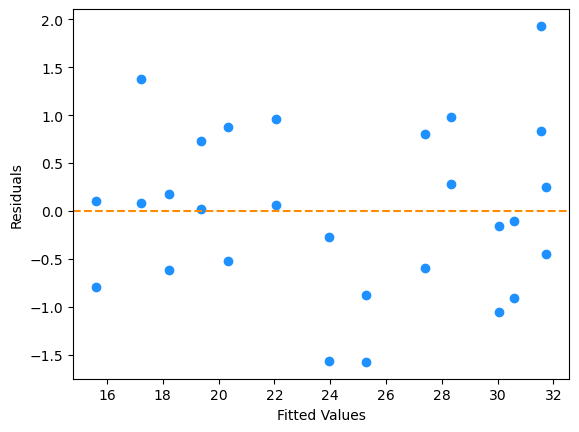

In [49]:
#plot the residuals
plt.scatter(fit4.fittedvalues, fit4.resid, c='dodgerblue')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, linestyle='--', color='darkorange')
plt.show()


Ahora estamos progresando. El término de cuarto orden es significativo con los demás términos del modelo. También empezamos a ver lo que esperábamos para velocidades bajas y altas. Sin embargo, parece que sigue habiendo un cierto patrón en los residuos, así que volveremos a probar con más términos de orden superior. Añadiremos el quinto y el sexto juntos, ya que añadir el quinto será similar a añadir el tercero.


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     186.0
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           4.37e-17
Time:                        09:49:53   Log-Likelihood:                -31.665
No. Observations:                  28   AIC:                             77.33
Df Residuals:                      21   BIC:                             86.66
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.2063     12.043     -0.349      

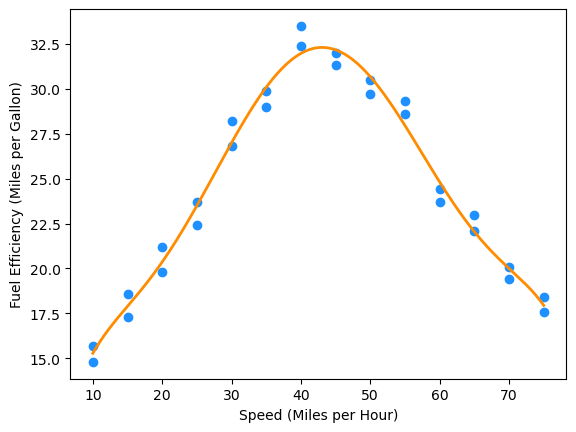

In [50]:
fit6 = smf.ols('mpg ~ mph + I(mph ** 2) + I(mph ** 3) + I(mph ** 4) + I(mph ** 5) + I(mph ** 6)', data=econ).fit()
print(fit6.summary())
plot_econ_curve(fit6, econ)


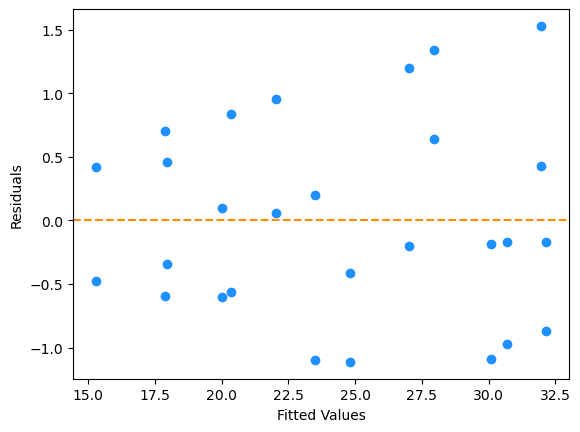

In [51]:
#plot the residuals
plt.scatter(fit6.fittedvalues, fit6.resid, c='dodgerblue')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, linestyle='--', color='darkorange')
plt.show()


De nuevo, el término de sexto orden es significativo con los demás términos del modelo y aquí vemos menos patrón en el gráfico de residuos. Probemos ahora cuál de los dos modelos anteriores preferimos. Probaremos

$$H_0: \beta_5 = \beta_6 = 0.$$


In [52]:
# ANOVA between fit4 and fit6
print(sm.stats.anova_lm(fit4, fit6))

   df_resid        ssr  df_diff   ss_diff         F    Pr(>F)
0      23.0  19.921504      0.0       NaN       NaN       NaN
1      21.0  15.738708      2.0  4.182796  2.790531  0.084196



Así pues, esta prueba no rechaza la hipótesis nula a un nivel de significación de $\alpha = 0,05$, sin embargo el valor p sigue siendo bastante pequeño, y el gráfico de ajuste frente a residuos es mucho mejor para el modelo con el término de sexto orden. Esto hace que el modelo de sexto orden sea una buena elección. Podemos repetir este proceso una vez más.


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     157.5
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.40e-16
Time:                        09:49:54   Log-Likelihood:                -33.947
No. Observations:                  28   AIC:                             81.89
Df Residuals:                      21   BIC:                             91.22
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0145      0.001     13.302      

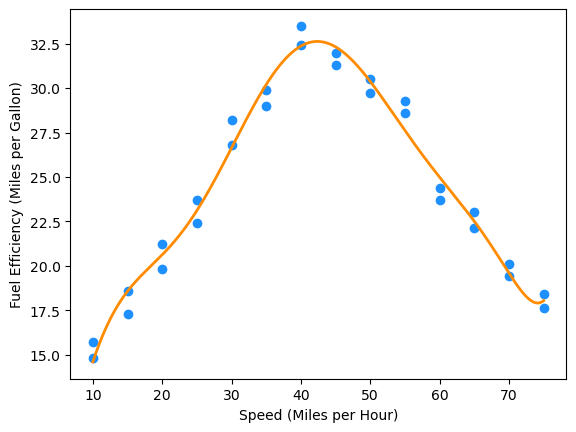

In [53]:
fit8 = smf.ols('mpg ~ mph + I(mph ** 2) + I(mph ** 3) + I(mph ** 4) + I(mph ** 5) + I(mph ** 6) + I(mph ** 7) + I(mph ** 8)', data=econ).fit()
print(fit8.summary())
plot_econ_curve(fit8, econ)


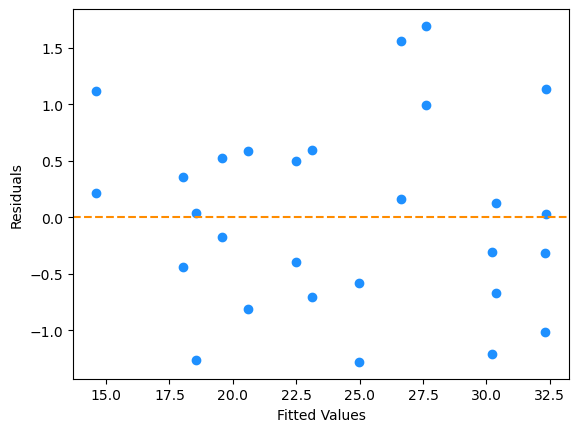

In [54]:
#plot the residuals
plt.scatter(fit8.fittedvalues, fit8.resid, c='dodgerblue')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, linestyle='--', color='darkorange')
plt.show()

In [55]:
print(sm.stats.anova_lm(fit6, fit8))

   df_resid        ssr  df_diff   ss_diff    F  Pr(>F)
0      21.0  15.738708      0.0       NaN  NaN     NaN
1      21.0  18.524790     -0.0 -2.786082  inf     NaN



Aquí nos quedaríamos claramente con `fit6`. El término de octavo orden no es significativo con los demás términos del modelo y la prueba F no rechaza.



Ya hemos visto cómo transformar las variables predictoras y de respuesta. En esta lectura nos hemos centrado principalmente en su uso en el contexto de la fijación de modelos SLR. Sin embargo, estos conceptos pueden utilizarse fácilmente junto con variables categóricas e interacciones para construir modelos más amplios y flexibles. En el próximo capítulo, analizaremos cómo elegir un buen modelo entre una colección de modelos posibles.




## Transformaciones de respuesta


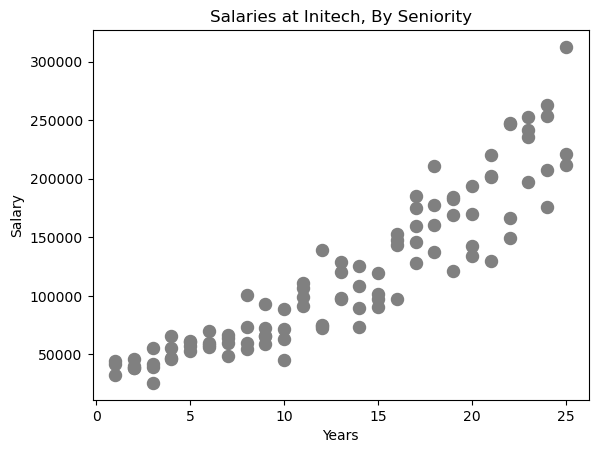

In [56]:
# Plot the salary vs years
plt.scatter(initech.years, initech.salary, color='grey', s=75)
plt.title("Salaries at Initech, By Seniority")
plt.xlabel("Years")
plt.ylabel("Salary")
plt.show()

In [57]:
# Fit the linear model
initech_fit = smf.ols('salary ~ years', data=initech).fit()
print(initech_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     492.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           5.16e-40
Time:                        09:49:54   Log-Likelihood:                -1162.5
No. Observations:                 100   AIC:                             2329.
Df Residuals:                      98   BIC:                             2334.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5302.0807   5749.963      0.922      0.3

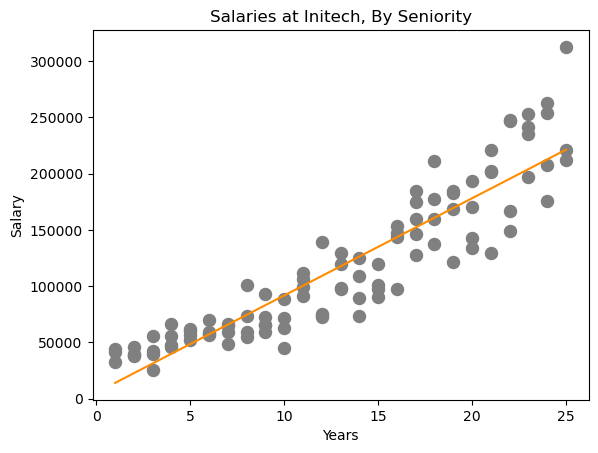

In [58]:
# Plotting with regression line
plt.scatter(initech.years, initech.salary, color='grey', s=75)
plt.plot(initech.years, initech_fit.fittedvalues, color='darkorange')
plt.title("Salaries at Initech, By Seniority")
plt.xlabel("Years")
plt.ylabel("Salary")
plt.show()

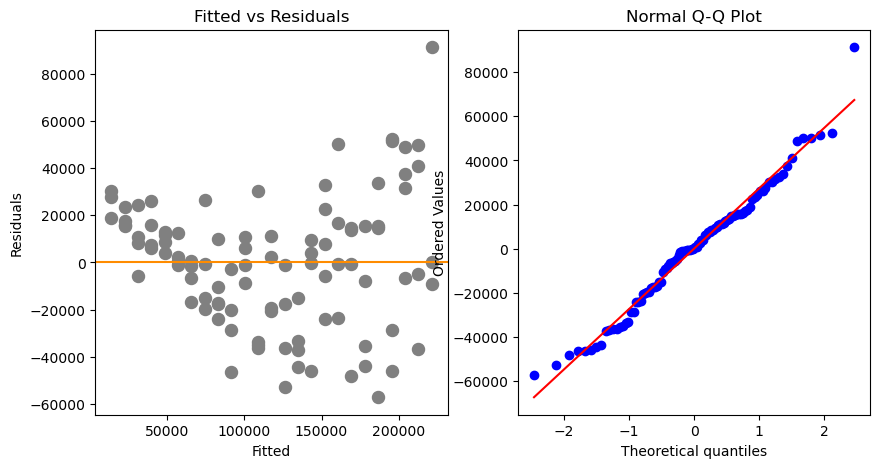

In [59]:
from scipy.stats import probplot
# Plotting residuals
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.scatter(initech_fit.fittedvalues, initech_fit.resid, color='grey', s=75)
plt.axhline(y=0, color='darkorange')
plt.title("Fitted vs Residuals")
plt.xlabel("Fitted")
plt.ylabel("Residuals")

plt.subplot(1, 2, 2)
probplot(initech_fit.resid, plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [60]:
# Log Transformation
initech_fit_log = smf.ols('np.log(salary) ~ years', data=initech).fit()

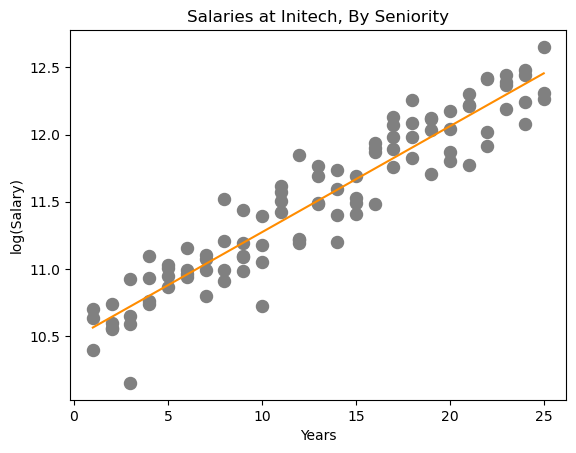

In [61]:
# Plotting log transformation
plt.scatter(initech.years, np.log(initech.salary), color='grey', s=75)
plt.plot(initech.years, initech_fit_log.fittedvalues, color='darkorange')
plt.title("Salaries at Initech, By Seniority")
plt.xlabel("Years")
plt.ylabel("log(Salary)")
plt.show()

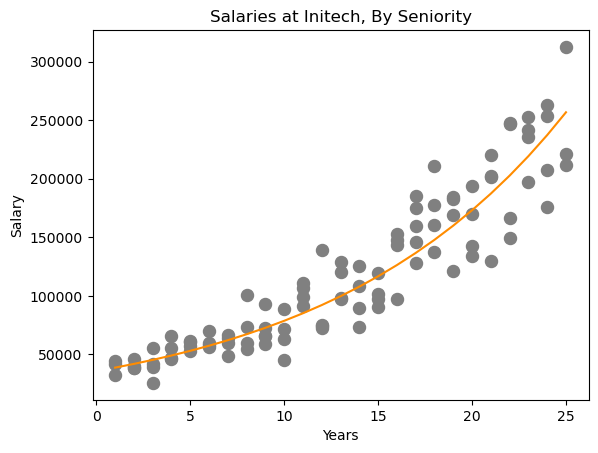

In [62]:
# Plotting Exponential of Fitted values
plt.scatter(initech.years, initech.salary, color='grey', s=75)
plt.plot(initech.years, np.exp(initech_fit_log.fittedvalues), color='darkorange')
plt.title("Salaries at Initech, By Seniority")
plt.xlabel("Years")
plt.ylabel("Salary")
plt.show()

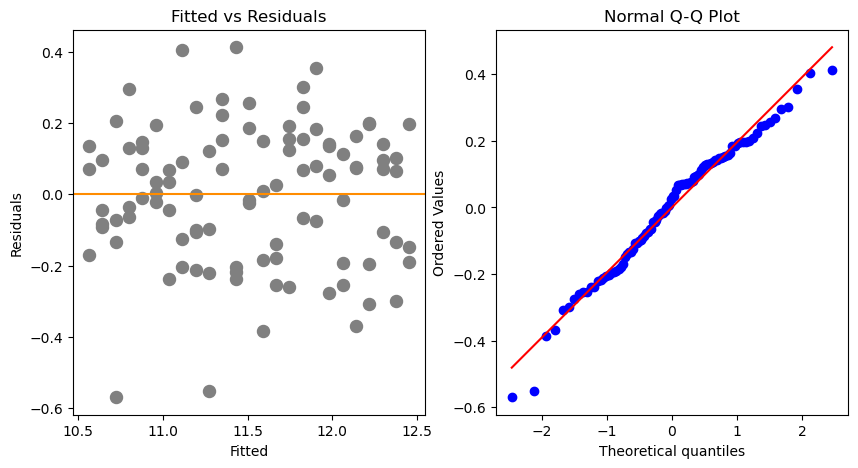

In [63]:
# Plotting residuals after log transformation
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.scatter(initech_fit_log.fittedvalues, initech_fit_log.resid, color='grey', s=75)
plt.axhline(y=0, color='darkorange')
plt.title("Fitted vs Residuals")
plt.xlabel("Fitted")
plt.ylabel("Residuals")

plt.subplot(1, 2, 2)
probplot(initech_fit_log.resid, plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [64]:
# Calculating RMSE
rmse_original = np.sqrt(np.mean(initech_fit.resid ** 2))
rmse_log_transformed = np.sqrt(np.mean(initech_fit_log.resid ** 2))
rmse_fitted = np.sqrt(np.mean((initech.salary - initech_fit.fittedvalues) ** 2))

print("RMSE Original:", rmse_original)
print("RMSE Log Transformed:", rmse_log_transformed)
print("RMSE Fitted:", rmse_fitted)

RMSE Original: 27080.161878492752
RMSE Log Transformed: 0.19349066503490941
RMSE Fitted: 27080.161878492752



## Transformaciones del predictor

### Un modelo cuadrático


In [65]:
np.random.seed(314)

def sim_quad(sample_size=500):
    x = np.random.uniform(0, 5, sample_size)
    y = 3 + 5 * x**2 + np.random.normal(0, 5, sample_size)
    return pd.DataFrame({'x': x, 'y': y})

quad_data = sim_quad(200)

In [66]:
# Linear Fit
lin_fit = smf.ols('y ~ x', data=quad_data).fit()
print(lin_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     2453.
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.64e-113
Time:                        09:49:55   Log-Likelihood:                -748.10
No. Observations:                 200   AIC:                             1500.
Df Residuals:                     198   BIC:                             1507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.6439      1.445    -11.515      0.0

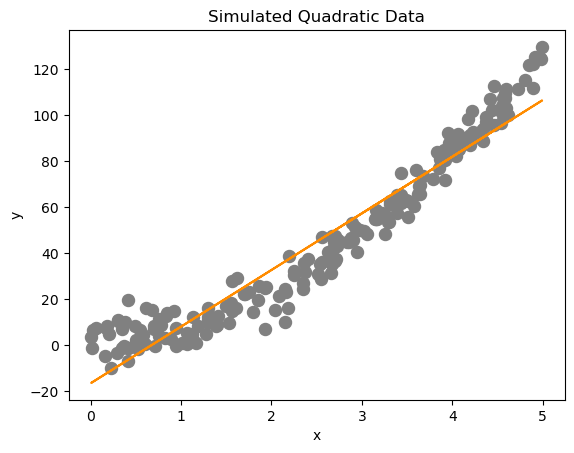

In [67]:
# Plot Simulated Quadratic Data with Linear Fit
plt.scatter(quad_data.x, quad_data.y, color='grey', s=75)
plt.plot(quad_data.x, lin_fit.fittedvalues, color='darkorange')
plt.title("Simulated Quadratic Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


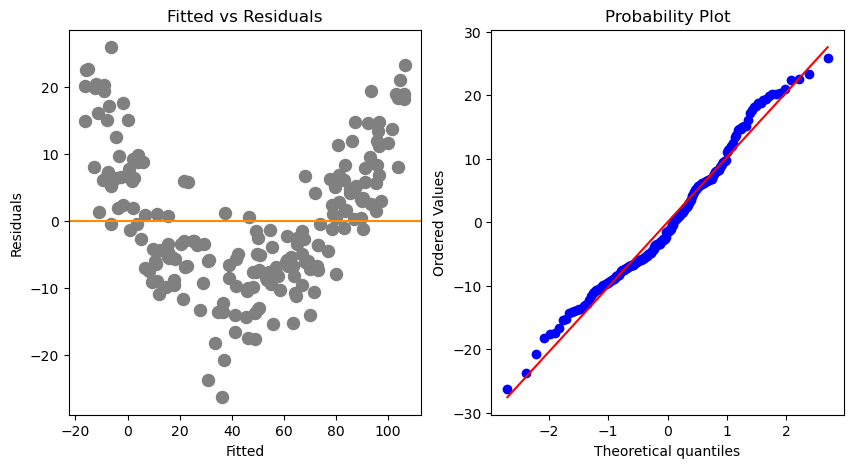

In [68]:
# Plot Residuals and QQ Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(lin_fit.fittedvalues, lin_fit.resid, color='grey', s=75)
ax[0].axhline(y=0, color='darkorange')
ax[0].set_title("Fitted vs Residuals")
ax[0].set_xlabel("Fitted")
ax[0].set_ylabel("Residuals")
probplot(lin_fit.resid, plot=ax[1])
plt.show()

In [69]:
# Quadratic Fit
quad_fit = smf.ols('y ~ x + I(x**2)', data=quad_data).fit()
print(quad_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     4481.
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          5.83e-165
Time:                        09:49:55   Log-Likelihood:                -623.64
No. Observations:                 200   AIC:                             1253.
Df Residuals:                     197   BIC:                             1263.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0693      1.151      1.798      0.0

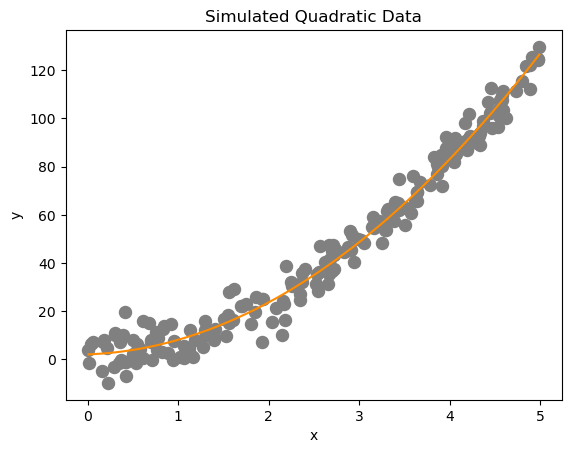

In [70]:
# Plot Simulated Quadratic Data with Quadratic Fit
plt.scatter(quad_data.x, quad_data.y, color='grey', s=75)
x_sorted = np.sort(quad_data.x)
plt.plot(x_sorted, quad_fit.params[0] + quad_fit.params[1] * x_sorted + quad_fit.params[2] * x_sorted**2, color='darkorange')
plt.title("Simulated Quadratic Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

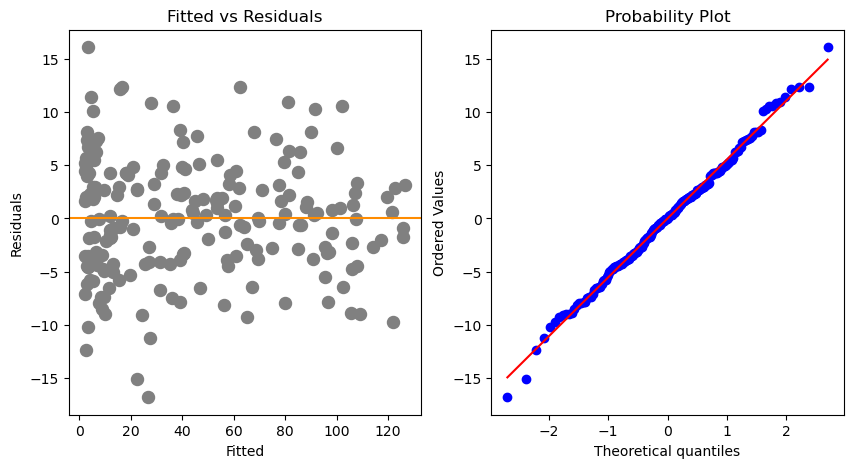

In [71]:
# Plot Residuals and QQ Plot for Quadratic Fit
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(quad_fit.fittedvalues, quad_fit.resid, color='grey', s=75)
ax[0].axhline(y=0, color='darkorange')
ax[0].set_title("Fitted vs Residuals")
ax[0].set_xlabel("Fitted")
ax[0].set_ylabel("Residuals")
probplot(quad_fit.resid, plot=ax[1])
plt.show()